In [148]:
# Automatic Differentiation
import tensorflow as tf
%matplotlib inline
import numpy as np
from IPython import display
from d2l import tensorflow as d2l

x = tf.range(4, dtype=tf.float32)
x

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0., 1., 2., 3.], dtype=float32)>

In [149]:
x = tf.Variable(x)

In [150]:
with tf.GradientTape() as t:
    y = 2*tf.tensordot(x, x, axes = 1) # objective (target) function to maximize가 여기에 들어가면 될 것 같습니다.
y

<tf.Tensor: shape=(), dtype=float32, numpy=28.0>

In [151]:
x_grad = t.gradient(y, x)
x_grad

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([ 0.,  4.,  8., 12.], dtype=float32)>

In [152]:
x_grad == 4*x

<tf.Tensor: shape=(4,), dtype=bool, numpy=array([ True,  True,  True,  True])>

In [153]:
# Take another example for clarity.
with tf.GradientTape() as t:
    y = tf.reduce_sum(x)
t.gradient(y, x) # Overwritten by the newly calculated gradient.

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([1., 1., 1., 1.], dtype=float32)>

In [154]:
# Backward for Non-Scalar Variables
with tf.GradientTape() as t:
    #y = x*x
    y = tf.reduce_sum(x*x)
t.gradient(y,x)

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0., 2., 4., 6.], dtype=float32)>

In [155]:
# Detaching Computation
# Set 'persistent=True' to run 't.gradient' more than once
with tf.GradientTape(persistent=True) as t:
    y = x*x
    u = tf.stop_gradient(y)
    z = u*x
    
x_grad = t.gradient(z, x)
x_grad, u

(<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0., 1., 4., 9.], dtype=float32)>,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0., 1., 4., 9.], dtype=float32)>)

In [156]:
# Possible since 'persistent=True' option is given!
t.gradient(y, x), 2 * x

(<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0., 2., 4., 6.], dtype=float32)>,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0., 2., 4., 6.], dtype=float32)>)

In [157]:
# Computing the Gradient of Python Control Flow
def f(a):
    b = a * 2
    #while tf.norm(b) < 1000:
    #    b = b * 2
    if tf.reduce_sum(b) > 0:
        c = b
    else:
        c = b**2
    return c

In [158]:
a = tf.Variable(tf.random.normal(shape=(2,2)))
with tf.GradientTape() as t:
    d = f(a)
d_grad = t.gradient(d, a)
a, d, d_grad

(<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
 array([[-0.3680096 , -1.152962  ],
        [-2.3430066 , -0.08995006]], dtype=float32)>,
 <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[ 0.54172426,  5.317285  ],
        [21.95872   ,  0.03236406]], dtype=float32)>,
 <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[ -2.9440768,  -9.223696 ],
        [-18.744053 ,  -0.7196005]], dtype=float32)>)

In [159]:
def use_svg_display(): #@save
    """"Use the svg format to display a plot in Jupyter."""
    display.set_matplotlib_formats('svg')

In [160]:
def set_figsize(figsize=(3.5, 2.5)): #@save
    """"Set the figure size for matplotlib."""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

In [161]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """"Set the axes for matplotlib."""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [162]:
# Using the above three functions for figure configurations, we define the 'plot()' function to plot multiple curves succinctly.hasattr
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None, ylim=None, xscale='linear', yscale='linear', fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """"Plot data points."""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # Return True if 'X' (tensor or list) has 1 axis
    def has_one_axis(X):
        return (hasattr(X, "ndim")) and X.ndim == 1 or isinstance(X, list) and not hasattr(X[0], "__len__")
    
    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

/tmp/ipykernel_81545/2676781076.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


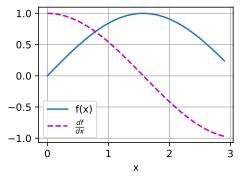

In [181]:
x = tf.Variable(np.arange(0, 3, 0.1))
with tf.GradientTape() as t:
    f = tf.math.sin(x)

#t.gradient(f, x)
plot(x.numpy(), [f, t.gradient(f, x).numpy()], 'x', legend=['f(x)', r'$\frac{df}{dx}$'])